#I write this as an introduction to machine learning

##Regression:

 * Act of fitting a curve to a given set of data.
 * Maybe useful in predicting unknowns or future values.
 
## Classification:
 * Act of devideng data in to catagories. (supervised or unsupervised learning)
 * Maybe useful in predicting unknowns.


### Linear regression : Fitting a straight line
####Equation of a straight line: 

<table style="width:30%" align="left" border="0">
<tr><td>In 2D</td><td>$ y = wx + b$</td></tr>
<tr><td>In 3D</td><td>$ y = w_1x_1+w_2x_2 + b$</td></tr>
<tr><td>In nD</td><td>$ y = \sum_{i=1}^{n}w_ix_i + b$</td></tr>
</table>

#### We rewrite these as a single matrix computation

<table style="width:40%" align="left" border="0">
<tr><td>In 2D</td><td>$ \begin{bmatrix}x_0 &x_1 \end{bmatrix} \begin{bmatrix}w_0\\w_1\end{bmatrix} =y$</td></tr>
<tr><td>In 3D</td><td>$ \begin{bmatrix}x_0 &x_1 &x_2 \end{bmatrix} \begin{bmatrix}w_0\\w_1\\w_2\end{bmatrix} =y$</td></tr>
<tr><td>In nD</td><td>$ \begin{bmatrix}x_0 &x_1 &.&.&.& x_n \end{bmatrix} \begin{bmatrix}w_0\\w_1\\.\\.\\.\\w_n\end{bmatrix} =y$</td></tr>
</table>

$x_0$ in above matrices in always 1 and $w_0$ is the bias term

If we have __m__ samples in our data set this can be written as.

$
\begin{bmatrix}
x_0^1 & x_1^1 & x_2^1 & . & . & . &x_n^1 \\ 
x_0^2 & x_1^2 & x_2^2 & . & . & . &x_n^2 \\ 
x_0^3 & x_1^3 & x_2^3 & . & . & . &x_n^3 \\ 
 &  & . &  &  &  & \\ 
 &  & . &  &  &  & \\ 
 &  & . &  &  &  & \\ 
x_0^m & x_1^m & x_2^m & . & . & . &x_n^m 
\end{bmatrix}
\begin{bmatrix}
w_0\\ 
w_1\\ 
w_2\\ 
.\\ 
.\\ 
.\\ 
w_n\\
\end{bmatrix}= 
\begin{bmatrix}
y_1\\ 
y_2\\ 
y_3\\ 
.\\ 
.\\ 
.\\ 
y_m\\
\end{bmatrix}
$

Our goal is to find suitable values for $w$ to best represent our dataset

There are different ways of solving for $w$. Lets first create an example data set (2 dimensional)

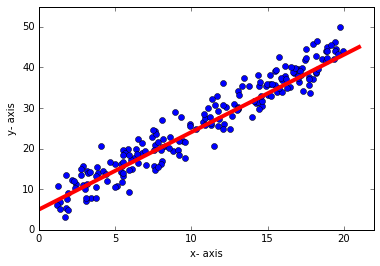

In [36]:
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Select weights and bias values to create data
w_1=2
w_0=5 #bias term

# Create data
x=np.random.uniform(1,20,size=200)

# We create y values usind selected weight and bias then adding some random noise to it
y=x*w_1+w_0+np.random.normal(0,3,size=len(x))

# Plot data

plt.plot(x, y, "o", [0,21],[0*w_1+w_0,20*w_1+w_0],"r-",linewidth=4)
plt.xlim(0,max(x)*1.1)
plt.ylim(0,max(y)*1.1)
plt.xlabel('x- axis')
plt.ylabel('y- axis')
plt.show()


###Normal equation
Most straightforward way of solving for weight values is using normal equation.

$$XW=Y$$
$$X^T X W=X^TY$$
$$W=(X^TX)^{-1}X^TY$$

####Using numpy matrices

In [29]:
X=np.matrix([[1]*len(x),x]).getT()
Y=np.matrix(y)
W=(X.getT()*X).getI()*X.getT()*Y.getT()
print 'W_0 = %0.2f'%W[0]
print 'W_1 = %0.2f'%W[1]

W_0 = 4.60
W_1 = 2.03


####Using sklearn library in python

In [30]:
from sklearn import linear_model
# Create linear regression object
l_reg=linear_model.LinearRegression()

# Train model
l_reg.fit(x.reshape(-1,1),Y.reshape(-1,1))

print 'W_0 = %0.2f'%l_reg.intercept_
print 'W_1 = %0.2f'%l_reg.coef_

W_0 = 4.60
W_1 = 2.03


When we create the dataset we used $w_0=5 $ and $w_1=2$ , how do they compare to weights calculated using Normal equation?

###Least squares mean method
In this method we try to find a curve such that the sum of the squares of the distance from curve to data points will be minimum.<br>
For a 2D data set such as our previous example data we can write following formula.
$$ \begin{bmatrix}x_0 &x_1 \end{bmatrix} \begin{bmatrix}w_0\\w_1\end{bmatrix} =\hat{y}$$

$\hat{y}$ is the estimated y value for given $x$ using $w$ weights 

Our goal is to minimize $\frac{1}{m}\sum_{i=1}^{m}(\hat{y^i}-y^i)^2$ with respect to $w$ weights, lets call this loss $(J(w))$. This is devided by 2 considering future calculations (Gradient descent)


$$\begin{equation}
\begin{split}
J(w)& = \frac{1}{2m}\sum_{i=1}^{m}(\hat{y^i}-y^i)^2 \\
 & = \frac{1}{2m}\sum_{i=1}^{m}(w_0+w_1x_1^i-y^i)^2
\end{split}
\end{equation}$$
In order to minimize thie loss function we are going to use Gradient descent approach


###Gradient Descent

In gradient descent approach we iteratively converge weight values using following formula, that is we move weights towards their negative gradient direction step by step. We have to make sure that we do this simultaniously in all weights.

$$ w_j=w_j-\alpha \frac{\partial J(w)}{\partial w_j}$$


In our 2 dimensional example we have two weights, intercept (bias) and slope of the line:

$$\begin{equation}
\begin{split}
w_0 & = w_0-\alpha\frac{1}{m}\sum_{i=1}^{m}(\hat{y^i}-y^i) \\
w_1 & = w_1-\alpha\frac{1}{m}\sum_{i=1}^{m}((\hat{y^i}-y^i)x^i)
\end{split}
\end{equation}$$

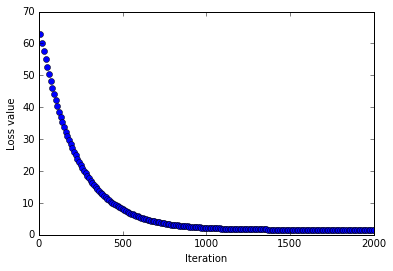

W_0 = 5.41
W_1 = 1.98


In [4]:
alpha=0.0005
w=np.array([[0],[0]])
iterations=2001
m=len(Y)
cost_hist=[]
ite=[]

def cost_j(X,Y,w):
    te=(X*w-Y.getT())
    return float(te.getT()*te)/(2*len(Y))

for i in range(iterations):
    w=w-(alpha/m)*X.getT()*(X*w-Y.getT())
    if i%10==0 and i!=0:
        cost_hist.append(cost_j(X,Y,w))
        ite.append(i)
        
plt.plot(ite,cost_hist,'o')
plt.xlabel('Iteration')
plt.ylabel('Loss value')
plt.show() 
print 'W_0 = %0.2f'%w[0]
print 'W_1 = %0.2f'%w[1]

####It turns out that the output of this algorithm is very sensitive to our selection of alpha value. If algorithm doesn't converge choose a smaller alpha value

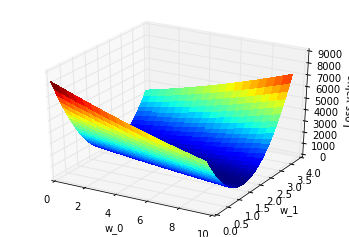

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

def cost_j(X,Y,w):
    te=(X*w-Y.getT())
    return float(te.getT()*te)/(2*len(Y))


fig = plt.figure()
ax = fig.gca(projection='3d')
w_0 = np.arange(0, 10, 0.5)
w_1 = np.arange(0, 4, 0.1)
w_0, w_1 = np.meshgrid(w_0, w_1)
x_len=np.shape(w_0)[0]
y_len=np.shape(w_1)[1]
Z=[[cost_j(X,Y,np.array([[w_0[i][j]],[w_1[i][j]]])) for j in range(y_len)] for i in range(x_len)]

ax.plot_surface(w_0, w_1, Z, rstride=1, cstride=1, cmap=cm.jet,linewidth=0, antialiased=False)
ax.set_xlabel('w_0')
ax.set_ylabel('w_1')
ax.set_zlabel('Loss value')
plt.show()

###There are lots of different ways to minimize a function. Following is another method using Nelder-Mead algorithm in scipy.optimize library

In [48]:
from scipy.optimize import minimize
w=np.array([0,0])
def cost_j(w):
    w1=np.matrix([w[0],w[1]])
    te=(X*w1.getT()-Y.getT())
    return float(te.getT()*te)/(2*len(Y))
res = minimize(cost_j, w, method='nelder-mead',options={'xtol': 1e-2, 'disp': True})
print 'W_0 = %0.2f'%res.x[0]
print 'W_1 = %0.2f'%res.x[1]

Optimization terminated successfully.
         Current function value: 2.890870
         Iterations: 75
         Function evaluations: 144
W_0 = 5.12
W_1 = 2.01


###Using Tensorflow to do gradient descent

In [38]:
import tensorflow as tf

w0_tf = tf.Variable(tf.zeros([1]))
w1_tf = tf.Variable(tf.zeros([1]))
Y_tf=Y.getT()
X_tf=X[:,1]

loss = tf.reduce_mean(tf.square(X_tf*w1_tf+w0_tf - Y_tf))
 
optimizer = tf.train.GradientDescentOptimizer(0.005)
train = optimizer.minimize(loss)
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

for step in xrange(2001):
    sess.run(train)

print 'W_0 = %0.2f'%sess.run(w0_tf)
print 'W_1 = %0.2f'%sess.run(w1_tf)

W_0 = 5.41
W_1 = 1.98
